Link to download the data: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset?resource=download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/data.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [3]:
df["RM"] = df["RM"].fillna(df["RM"].mean())
len(df[df["RM"].isnull()])

0

In [4]:
len(df[df.duplicated()])

0

In [5]:
df["AGE"].min(), df["AGE"].max()

(np.float64(2.9), np.float64(100.0))

<Axes: >

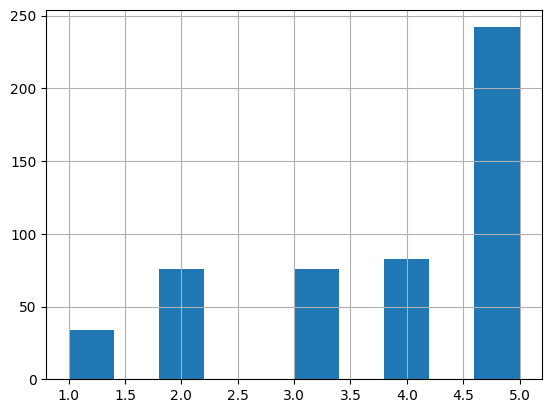

In [6]:
df["AGE_gr"] = pd.cut(
	df["AGE"],
    bins=[0, 20, 40, 60, 80, np.inf],
    labels=[1, 2, 3, 4, 5]
)

df["AGE_gr"].hist()

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["AGE_gr"], random_state=42)
df_train.shape, df_test.shape

((408, 15), (103, 15))

In [8]:
df_train = df_train.drop("AGE_gr", axis=1)
df_test = df_test.drop("AGE_gr", axis=1)
df_train.shape, df_test.shape

((408, 14), (103, 14))

CRIM-MDEV: -0.37870098882448433
ZN-MDEV: 0.33186868053041546
INDUS-MDEV: -0.45130493595557364
CHAS-MDEV: 0.08691416934285516
NOX-MDEV: -0.41350293768242924
RM-MDEV: 0.6822679772650098
AGE-MDEV: -0.38423306603657825
DIS-MDEV: 0.225701531330331
RAD-MDEV: -0.3744377428055429
TAX-MDEV: -0.44284888964930114
PTRATIO-MDEV: -0.4102835413156108
B-MDEV: 0.32557718551153986
LSTAT-MDEV: -0.5152773176187191


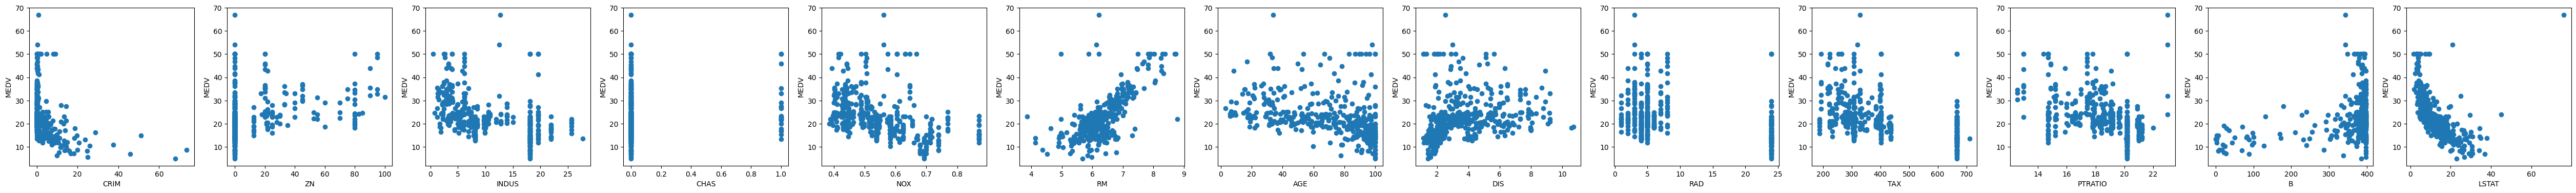

In [9]:
fig, axs = plt.subplots(1, 13, figsize=(64, 4))
feature_cols = df_train.drop("MEDV", axis=1).columns
for i, col in enumerate(feature_cols):
    axs[i].scatter(df_train[col], df_train["MEDV"])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("MEDV")
    print(f"{col}-MDEV: {df_train[[col, 'MEDV']].corr()[col]['MEDV']}")

0.27276842762247205


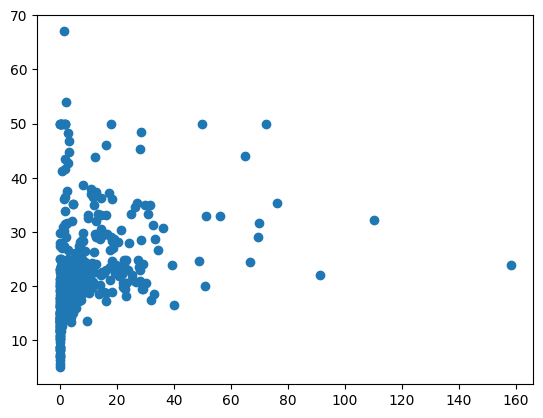

In [10]:
df_train["1/CRIM"] = df_train["CRIM"].apply(lambda x: 1 / x)
plt.scatter(df_train["1/CRIM"], df_train["MEDV"])
print(df_train[["1/CRIM", "MEDV"]].corr()["1/CRIM"]["MEDV"])

0.2836108451589131


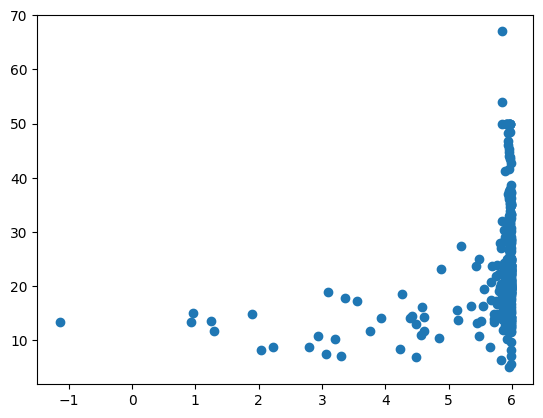

In [11]:
df_train["log_B"] = df_train["B"].apply(lambda x: np.log(x))
plt.scatter(df_train["log_B"], df_train["MEDV"])
print(df_train[["log_B", "MEDV"]].corr()["log_B"]["MEDV"])

0.7313520494017355


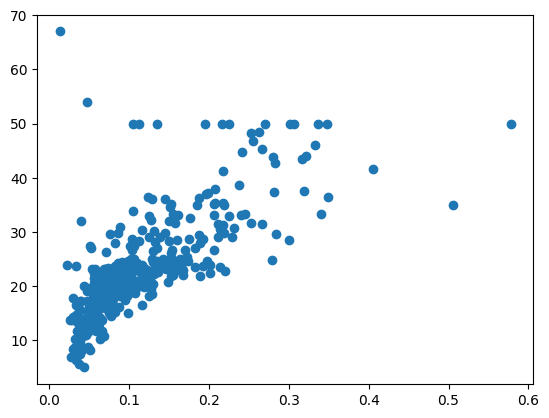

In [12]:
df_train["1/LSTAT"] = df_train["LSTAT"].apply(lambda x: 1 / x)
plt.scatter(df_train["1/LSTAT"], df_train["MEDV"])
print(df_train[["1/LSTAT", "MEDV"]].corr()["1/LSTAT"]["MEDV"])

In [13]:
df_train = df_train.drop(columns=["1/CRIM", "log_B"])
df_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', '1/LSTAT'],
      dtype='object')

In [14]:
def split_Xy(df, target):
    return df.drop(target, axis=1), df[[target]]

target = "MEDV"
X_train, y_train = split_Xy(df_train, target)
X_train.shape, y_train.shape

((408, 14), (408, 1))

In [16]:
from sklearn.preprocessing import StandardScaler

ss_features = StandardScaler().fit(X_train)
ss_target = StandardScaler().fit(y_train)

X_scaled = pd.DataFrame(ss_features.transform(X_train), columns=X_train.columns) \
    .drop("LSTAT", axis=1)
y_scaled = pd.DataFrame(ss_target.transform(y_train), columns=y_train.columns)

X_scaled.shape, y_scaled.shape

((408, 13), (408, 1))

In [18]:
import pickle as pkl

pkl.dump(ss_features, open("../models/preprocess/scaler_features.pkl", "wb"))
pkl.dump(ss_target, open("../models/preprocess/scaler_target.pkl", "wb"))

pkl.load(open("../models/preprocess/scaler_features.pkl", "rb"))

,copy,True
,with_mean,True
,with_std,True


/tmp/ipykernel_90956/963728607.py:5: RuntimeWarning: overflow encountered in add
  cost += ((np.dot(w, X[i]) + b) - y[i]) ** 2
/tmp/ipykernel_90956/963728607.py:5: RuntimeWarning: overflow encountered in square
  cost += ((np.dot(w, X[i]) + b) - y[i]) ** 2
/tmp/ipykernel_90956/963728607.py:13: RuntimeWarning: overflow encountered in add
  dj_dw += ((np.dot(w, X[i]) + b) - y[i]) * X[i]
/tmp/ipykernel_90956/963728607.py:5: RuntimeWarning: invalid value encountered in dot
  cost += ((np.dot(w, X[i]) + b) - y[i]) ** 2
/tmp/ipykernel_90956/963728607.py:13: RuntimeWarning: invalid value encountered in dot
  dj_dw += ((np.dot(w, X[i]) + b) - y[i]) * X[i]
/tmp/ipykernel_90956/963728607.py:14: RuntimeWarning: invalid value encountered in dot
  dj_db += ((np.dot(w, X[i]) + b) - y[i])


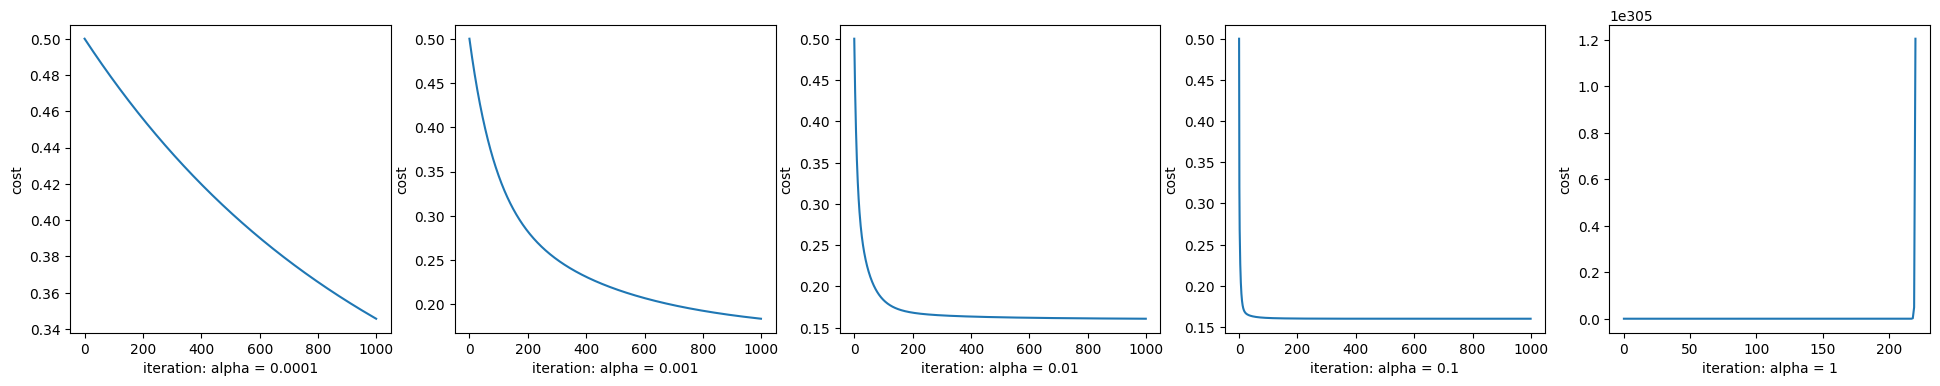

In [19]:
def compute_cost(w, X, y, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += ((np.dot(w, X[i]) + b) - y[i]) ** 2
    return cost / (2 * m)

def compute_gradient(w, X, y, b):
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += ((np.dot(w, X[i]) + b) - y[i]) * X[i]
        dj_db += ((np.dot(w, X[i]) + b) - y[i])
    return dj_dw / m, dj_db / m

def gradient_descent(X, y, alpha, max_iter):
    w = [0] * X.shape[1]
    b = 0
    j = []
    for _ in range(max_iter):
        j.append(compute_cost(w, X, y, b))
        dj_dw, dj_db = compute_gradient(w, X, y, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b, j

alpha = [0.0001, 0.001, 0.01, 0.1, 1]
max_iter = 1000

fig, axs = plt.subplots(1, len(alpha), figsize=(24, 4))
gds = []
for i, a in enumerate(alpha):
    gd = gradient_descent(X_scaled.values, y_scaled.values, a, max_iter=max_iter)
    gds.append([gd[0], gd[1]])
    axs[i].plot(range(max_iter), gd[2])
    axs[i].set_xlabel(f"iteration: alpha = {a}")
    axs[i].set_ylabel("cost")

In [21]:
X_scaled["AGE"].min(), X_scaled["AGE"].max()

(np.float64(-2.3504267021255827), np.float64(1.1189388835302685))

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

df_scaled = pd.concat([X_scaled, y_scaled], axis=1)

df_scaled["AGE_gr"] = pd.cut(
	df_scaled["AGE"],
    bins=[-3, -2, -1, 0, 1, np.inf],
    labels=[1, 2, 3, 4, 5]
)

k = 3
sss = StratifiedShuffleSplit(n_splits=k, random_state=42) \
    .split(df_scaled.drop("AGE_gr", axis=1), df_scaled["AGE_gr"])

df_scaled = df_scaled.drop("AGE_gr", axis=1)

mse = []
for i, (train_index, test_index) in enumerate(sss):
    df_ttrain = df_scaled.iloc[train_index]
    X_ttrain, y_ttrain = split_Xy(df_ttrain, target)
    df_validate = df_scaled.iloc[test_index]
    X_validate, y_validate = split_Xy(df_validate, target)

    sgdr = SGDRegressor(alpha=0.01, max_iter=1000).fit(X_ttrain, y_ttrain)
    y = ss_target.inverse_transform(y_validate)
    y_hat = ss_target.inverse_transform(sgdr.predict(X_validate).reshape(-1, 1))
    mse_fold = mean_squared_error(y, y_hat)
    print(f"fold {i}: MSE = {mse_fold}")
    mse.append(mse_fold)

sum(mse) / k

fold 0: MSE = 40.010289617703506
fold 1: MSE = 11.009512544921993
fold 2: MSE = 20.02551143769739


/home/champ/Projects/profile/real-estate-valuation/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/champ/Projects/profile/real-estate-valuation/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/champ/Projects/profile/real-estate-valuation/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


23.68177120010763

In [26]:
sgdr = SGDRegressor(alpha=0.01, max_iter=1000).fit(X_scaled, y_scaled)
pkl.dump(sgdr, open("../models/predict.pkl", "wb"))
pkl.load(open("../models/predict.pkl", "rb"))

/home/champ/Projects/profile/real-estate-valuation/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.01
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None
